# Makemore 1: bigrams

https://github.com/karpathy/makemore

In [42]:
words = open('civil_mots.txt', 'r').read().splitlines()

In [43]:
len(words)

7225

In [44]:
words[40:50]

['acceptée',
 'acceptées',
 'accessible',
 'accession',
 'accession"',
 'accessoire',
 'accessoirement',
 'accessoires',
 'accident',
 'accidents']

In [101]:
b = {}
chars = set()
for w in words:
#for w in ['accessoirement']:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        chars.add(ch1); chars.add(ch2)
        bigram = (ch1, ch2)
        #print(bigram)
        b[bigram] = b.get(bigram, 0) + 1

In [102]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('s', '<E>'), 1974),
 (('e', '<E>'), 1872),
 (('n', 't'), 1588),
 (('e', 'n'), 1427),
 (('o', 'n'), 1313),
 (('e', 's'), 1228),
 (('r', 'e'), 1200),
 (('t', '<E>'), 1187),
 (('t', 'i'), 1055),
 (('e', 'r'), 934),
 (('<S>', 'c'), 871),
 (('t', 'e'), 805),
 (('<S>', 'p'), 760),
 (('c', 'o'), 753),
 (('<S>', 'a'), 745),
 (('a', 'n'), 690),
 (('i', 't'), 669),
 (('i', 's'), 665),
 (('i', 'n'), 665),
 (('<S>', 'r'), 653),
 (('<S>', 'd'), 643),
 (('r', 'a'), 631),
 (('a', 't'), 613),
 (('l', 'e'), 612),
 (('i', 'o'), 601),
 (('m', 'e'), 573),
 (('r', '<E>'), 572),
 (('r', 'é'), 571),
 (('é', '<E>'), 531),
 (('<S>', 's'), 528),
 (('p', 'r'), 524),
 (('é', 'e'), 496),
 (('a', 'i'), 487),
 (('u', 'r'), 472),
 (('s', 'e'), 468),
 (('r', 'i'), 455),
 (('n', '<E>'), 451),
 (('n', 's'), 451),
 (('<S>', 'i'), 443),
 (('t', 'r'), 438),
 (('i', 'e'), 434),
 (('e', 'm'), 433),
 (('t', 'é'), 433),
 (('l', 'i'), 425),
 (('t', 'a'), 414),
 (('<S>', 'e'), 413),
 (('é', 's'), 408),
 (('s', 's'), 406),
 ((

In [51]:
print(chars)
print(len(chars))

{'l', 'é', "'", 'u', 'ê', 'ç', 'p', 'è', 'm', 'f', 'w', 'r', 'c', 'ô', 'â', 'g', '<E>', 'j', 'y', '"', 'n', '-', 'œ', 'b', 'a', 'o', 'à', '<S>', 'd', 'ï', 'h', 'ë', 'î', 't', 'v', 'i', 'q', 'z', 'û', 'e', 'x', 'ù', 's'}
43


In [52]:
import torch

In [53]:
N = torch.zeros((42, 42), dtype=torch.int32)

In [103]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [104]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

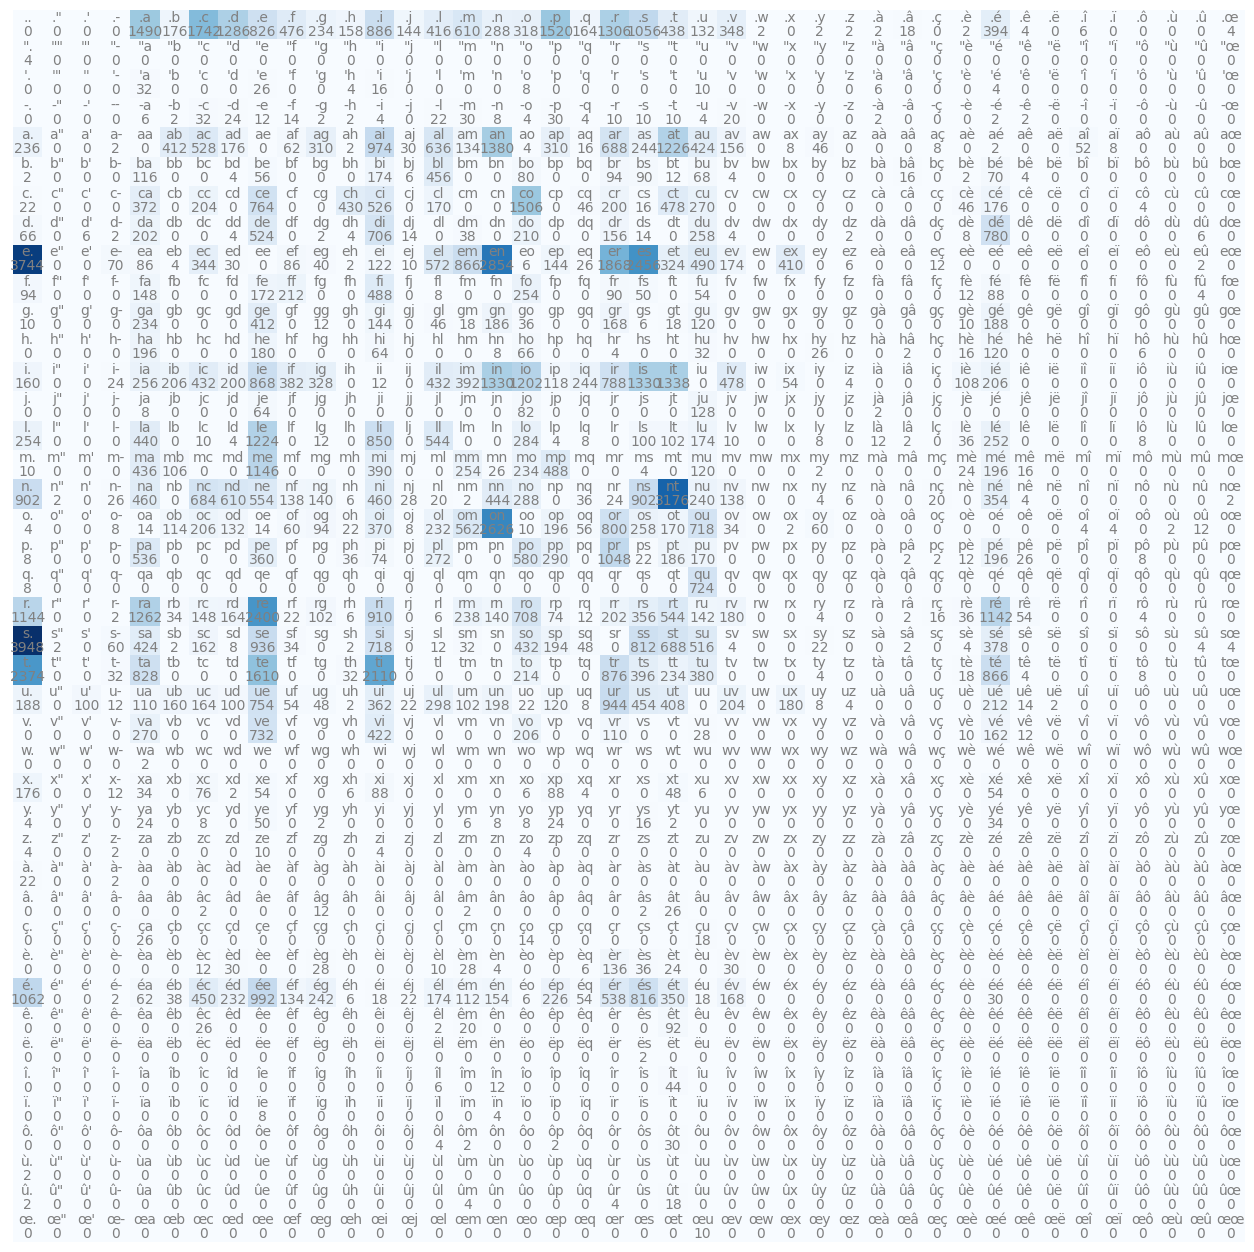

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(42):
    for j in range(42):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [106]:
N[0]

tensor([   0,    0,    0,    0, 1490,  176, 1742, 1286,  826,  476,  234,  158,
         886,  144,  416,  610,  288,  318, 1520,  164, 1306, 1056,  438,  132,
         348,    2,    0,    2,    2,    2,   18,    0,    2,  394,    4,    0,
           6,    0,    0,    0,    0,    4], dtype=torch.int32)

In [59]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.1031, 0.0122, 0.1206, 0.0890, 0.0572,
        0.0329, 0.0162, 0.0109, 0.0613, 0.0100, 0.0288, 0.0422, 0.0199, 0.0220,
        0.1052, 0.0113, 0.0904, 0.0731, 0.0303, 0.0091, 0.0241, 0.0001, 0.0000,
        0.0001, 0.0001, 0.0001, 0.0012, 0.0000, 0.0001, 0.0273, 0.0003, 0.0000,
        0.0004, 0.0000, 0.0000, 0.0000, 0.0000, 0.0003])

In [110]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'a'

In [111]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [112]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [67]:
p.shape

torch.Size([3])

In [113]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [70]:
P.shape

torch.Size([42, 42])

In [94]:
P.sum(1, keepdim=True).shape

torch.Size([42, 1])

In [72]:
P.sum(1).shape

torch.Size([42])

In [114]:
g = torch.Generator().manual_seed(2147483648)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
              break
    print(''.join(out))

vantré.
ioroduis.
réjuremintet.
dasaleuror.
amirâs.


In [79]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

In [130]:
log_likelihood = 0.0
n = 0

#for w in words:
for w in ["espérance"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.e: 0.0571 -2.8635
es: 0.1661 -1.7950
sp: 0.0205 -3.8850
pé: 0.0509 -2.9778
ér: 0.0906 -2.4011
ra: 0.1251 -2.0786
an: 0.1702 -1.7710
nc: 0.0705 -2.6517
ce: 0.1451 -1.9303
e.: 0.2532 -1.3735
log_likelihood=tensor(-23.7277)
nll=tensor(23.7277)
2.372765064239502


In [143]:
# create the training set of bigrams (x,y)
xs, ys = [], []

#for w in words:
for w in [words[40]]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    #print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(words[40])

acceptée


In [133]:
print(xs)

tensor([ 0,  4,  6,  6,  8, 18, 22, 33,  8])


In [134]:
xs


tensor([ 0,  4,  6,  6,  8, 18, 22, 33,  8])

In [135]:
ys

tensor([ 4,  6,  6,  8, 18, 22, 33,  8,  0])

In [136]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=42).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0.,

In [137]:
xenc.shape

torch.Size([9, 42])

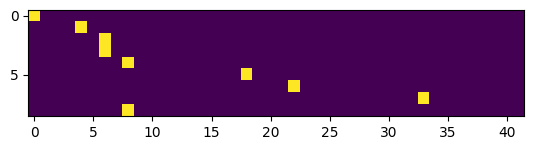

In [138]:
plt.imshow(xenc)

In [144]:
W = torch.randn((42, 9))
xenc @ W

tensor([[ 0.1065, -0.3544,  1.8890,  0.2066,  0.5276,  0.6598,  0.5340,  1.2260,
          0.3263],
        [-1.5479, -1.3295, -0.5590, -0.1395,  1.6120,  1.6654, -1.1862, -0.9680,
          0.7921],
        [ 0.7005, -0.1674, -0.6826,  0.4982, -1.0649, -0.5642,  0.6755, -2.0622,
          0.0190],
        [ 0.7005, -0.1674, -0.6826,  0.4982, -1.0649, -0.5642,  0.6755, -2.0622,
          0.0190],
        [-1.7937, -0.9574, -1.3793, -0.5041, -0.0764, -0.4950, -1.2775,  0.2958,
         -2.4966],
        [-0.5194, -0.6044,  0.6449,  0.1329, -1.2885, -0.3071, -0.5805,  0.7599,
          1.4710],
        [ 0.3897, -0.5162, -1.3201,  1.0896,  0.0905,  2.2803,  0.7675,  1.5534,
          0.9276],
        [ 1.6403,  1.3893, -1.3043,  0.5119,  0.8463,  0.2048,  0.7026, -0.2469,
         -0.1088],
        [-1.7937, -0.9574, -1.3793, -0.5041, -0.0764, -0.4950, -1.2775,  0.2958,
         -2.4966]])

In [145]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0562, 0.0355, 0.3342, 0.0621, 0.0857, 0.0978, 0.0862, 0.1722, 0.0700],
        [0.0141, 0.0175, 0.0378, 0.0576, 0.3317, 0.3499, 0.0202, 0.0251, 0.1461],
        [0.2230, 0.0936, 0.0559, 0.1821, 0.0382, 0.0629, 0.2174, 0.0141, 0.1128],
        [0.2230, 0.0936, 0.0559, 0.1821, 0.0382, 0.0629, 0.2174, 0.0141, 0.1128],
        [0.0358, 0.0826, 0.0542, 0.1300, 0.1994, 0.1312, 0.0600, 0.2892, 0.0177],
        [0.0486, 0.0446, 0.1555, 0.0932, 0.0225, 0.0600, 0.0457, 0.1745, 0.3554],
        [0.0577, 0.0233, 0.0104, 0.1161, 0.0428, 0.3820, 0.0842, 0.1847, 0.0988],
        [0.2808, 0.2185, 0.0148, 0.0909, 0.1269, 0.0668, 0.1099, 0.0425, 0.0488],
        [0.0358, 0.0826, 0.0542, 0.1300, 0.1994, 0.1312, 0.0600, 0.2892, 0.0177]])

In [154]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((42, 42), generator=g, requires_grad=True)

In [155]:
xenc = F.one_hot(xs, num_classes=42).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [156]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,4)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0491, 0.0081, 0.0100, 0.0034, 0.0136, 0.0099, 0.0022, 0.0187, 0.0111,
        0.0253, 0.0064, 0.0225, 0.0074, 0.0066, 0.0404, 0.1923, 0.0488, 0.0020,
        0.0201, 0.0044, 0.0274, 0.0088, 0.0023, 0.0160, 0.0095, 0.1243, 0.1180,
        0.0052, 0.0030, 0.0139, 0.0035, 0.0212, 0.0108, 0.0379, 0.0046, 0.0044,
        0.0017, 0.0358, 0.0030, 0.0345, 0.0039, 0.0081],
       grad_fn=<SelectBackward0>)
label (actual next character): 4
probability assigned by the net to the the correct character: 0.013619107194244862
log likelihood: -4.296281337738037
negative log likelihood: 4.296281337738037
--------
bigram example 2: ac (indexes 4,6)
input to the neural net: 4
output probabilities from the neural net: tensor([0.0112, 0.0068, 0.0746, 0.0285, 0.0359, 0.0183, 0.0102, 0.0099, 0.0056,
        0.0151, 0.0872, 0.0143, 0.0489, 0.0072, 0.0039, 0.0269, 0.0091, 0.0138,
        0

In [157]:
# forward pass
xenc = F.one_hot(xs, num_classes=42).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(9), ys].log().mean()

In [158]:
print(loss.item())

3.8940587043762207


In [159]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [160]:
W.data += -0.1 * W.grad

In [161]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((42, 42), generator=g, requires_grad=True)

number of examples:  67674


In [173]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=42).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.7761101722717285
2.744661808013916
2.717531442642212
2.6939849853515625
2.673412799835205
2.6553101539611816
2.6392621994018555
2.6249372959136963
2.612067699432373
2.6004395484924316
2.589878797531128
2.580244541168213
2.571418285369873
2.5633020401000977
2.5558133125305176
2.5488805770874023
2.5424447059631348
2.5364537239074707
2.5308613777160645
2.5256292819976807
2.520723342895508
2.516112804412842
2.5117721557617188
2.5076770782470703
2.503807783126831
2.500145196914673
2.496673107147217
2.493378162384033
2.4902451038360596
2.4872641563415527
2.484424114227295
2.481715440750122
2.4791297912597656
2.476659059524536
2.4742963314056396
2.4720349311828613
2.4698688983917236
2.467792510986328
2.4658010005950928
2.4638895988464355
2.4620537757873535
2.460289478302002
2.4585928916931152
2.456960439682007
2.4553890228271484
2.4538755416870117
2.452416181564331
2.4510090351104736
2.4496514797210693
2.448340892791748
2.4470748901367188
2.4458518028259277
2.444669008255005
2.4435245990753

In [174]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=42).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

aîuratives.
aciren.
pagantivie.
prifonfientix.
iont.
